# **GAN in 2-dimensions**

In this notebook we want to train a GAN to reproduce a simple 2-dimensional distribution. This is the starting block to build a GAN that can learn on multi-dimensional inbalanced datasets.

In [0]:
#@title Default title text
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
tf.reset_default_graph()

# **Definining generator and denominator**

In [0]:
def get_y(x):
    "generic quadratic function"
    return 10 + x*x

In [0]:
def sample_data(n=10000, scale=100):
    "generator of data sampled from a parabola centered in 0"
    data = []
    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])
        
    return np.array(data)

In [0]:
def sample_Z(m, n):
    "random generator, uniform distribution"
    return np.random.uniform(-1., 1., size=[m, n])

In [0]:
def generator(Z, hsize=[16, 16], reuse=False):
    """ 
    Generator function
    Z(): random sampled data
    hsize (int array): n units of the 2 hidden layers, hsize[2] should have same
    dim of the final dataset we want to learn
    
    Returns:
    (h2,2-dim) array
    """
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z, hsize[0], activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1, hsize[1], activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2, 2)

    return out


In [0]:
def discriminator(X,hsize=[16, 16],reuse=False):
    """ 
    Discriminator function
    X(): samples from the vector space of real dataset, both real and generated
    hsize (int array): n units of the 2 hidden layers
     
    Returns:
    out : logit prediction (inout for softmax or argmax) for the given X
    h3 : output of the last layer 
    """
    with tf.variable_scope("GAN/Discriminator", reuse=reuse):
        h1 = tf.layers.dense(X, hsize[0], activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1, hsize[1], activation=tf.nn.leaky_relu)
        # We fix the size of the third hidden layer to 2 so that we can later 
        # visualize the transformed feature space in a 2D plane 
        h3 = tf.layers.dense(h2, 2)
        out = tf.layers.dense(h3, 1)

    return out, h3


# **Defining loss function, optimizer and train step **

In [0]:
X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

# define graphs
# real data logits
r_logits, r_rep = discriminator(X)

G_sample = generator(Z)
# fake data logits
f_logits, g_rep = discriminator(G_sample,reuse=True)

# define loss functions
disc_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
    logits=r_logits,labels=tf.ones_like(r_logits)) + 
    tf.nn.sigmoid_cross_entropy_with_logits(
    logits=f_logits,labels=tf.zeros_like(f_logits))
                          )
gen_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,
                                            labels=tf.ones_like(f_logits)))

# define the optimizers
gen_vars = tf.get_collection(
    tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(
    tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

# G Train step
gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).\
           minimize(gen_loss,var_list = gen_vars) 
# D Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).\
            minimize(disc_loss,var_list = disc_vars) 

# **Training**

In [0]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10
training_steps = 10001

dloss_list = []
gloss_list = []

x_plot = sample_data(n=batch_size)

Iterations: 0	 Discriminator loss: 0.7489	 Generator loss: 0.6894


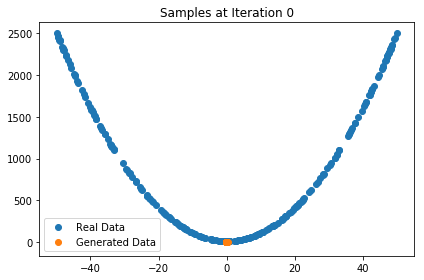

Iterations: 100	 Discriminator loss: 0.8948	 Generator loss: 5.9121
Iterations: 200	 Discriminator loss: 3.3868	 Generator loss: 0.5865
Iterations: 300	 Discriminator loss: 28.8399	 Generator loss: 0.0551
Iterations: 400	 Discriminator loss: 31.6639	 Generator loss: 0.0000
Iterations: 500	 Discriminator loss: 3.5896	 Generator loss: 0.0001
Iterations: 600	 Discriminator loss: 14.1603	 Generator loss: 0.0000
Iterations: 700	 Discriminator loss: 2.6734	 Generator loss: 0.6063
Iterations: 800	 Discriminator loss: 3.5622	 Generator loss: 0.0009
Iterations: 900	 Discriminator loss: 21.1569	 Generator loss: 0.0000
Iterations: 1000	 Discriminator loss: 2.5389	 Generator loss: 8.9983


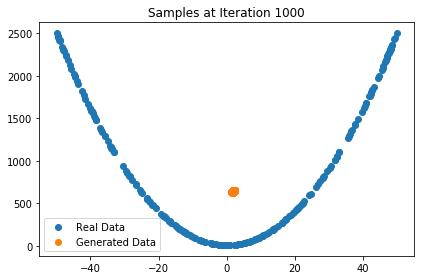

Iterations: 1100	 Discriminator loss: 13.1285	 Generator loss: 0.0000
Iterations: 1200	 Discriminator loss: 0.3435	 Generator loss: 2.9051
Iterations: 1300	 Discriminator loss: 3.7046	 Generator loss: 3.0102
Iterations: 1400	 Discriminator loss: 4.6606	 Generator loss: 0.0000
Iterations: 1500	 Discriminator loss: 1.7746	 Generator loss: 0.8577
Iterations: 1600	 Discriminator loss: 4.1822	 Generator loss: 4.3937
Iterations: 1700	 Discriminator loss: 2.1358	 Generator loss: 0.3305
Iterations: 1800	 Discriminator loss: 1.0889	 Generator loss: 1.2920
Iterations: 1900	 Discriminator loss: 0.9830	 Generator loss: 0.9734
Iterations: 2000	 Discriminator loss: 0.9592	 Generator loss: 0.8051


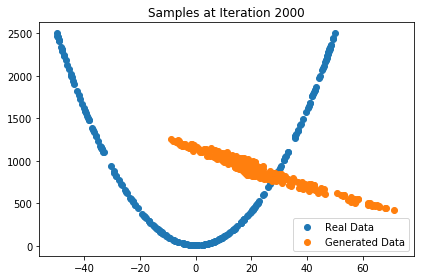

Iterations: 2100	 Discriminator loss: 1.2259	 Generator loss: 0.5662
Iterations: 2200	 Discriminator loss: 1.2097	 Generator loss: 0.5857
Iterations: 2300	 Discriminator loss: 1.2417	 Generator loss: 0.6266
Iterations: 2400	 Discriminator loss: 1.4750	 Generator loss: 0.7335
Iterations: 2500	 Discriminator loss: 1.3938	 Generator loss: 0.9914
Iterations: 2600	 Discriminator loss: 1.3298	 Generator loss: 0.6515
Iterations: 2700	 Discriminator loss: 1.3288	 Generator loss: 0.6231
Iterations: 2800	 Discriminator loss: 1.3718	 Generator loss: 0.5844
Iterations: 2900	 Discriminator loss: 1.3610	 Generator loss: 0.6284
Iterations: 3000	 Discriminator loss: 1.3145	 Generator loss: 0.6196


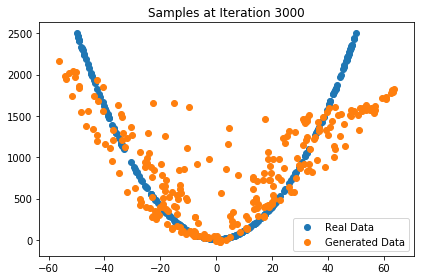

Iterations: 3100	 Discriminator loss: 1.3857	 Generator loss: 0.5933
Iterations: 3200	 Discriminator loss: 1.3554	 Generator loss: 0.5980
Iterations: 3300	 Discriminator loss: 1.3532	 Generator loss: 0.6479
Iterations: 3400	 Discriminator loss: 1.3536	 Generator loss: 0.6052
Iterations: 3500	 Discriminator loss: 1.3446	 Generator loss: 0.6178
Iterations: 3600	 Discriminator loss: 1.3182	 Generator loss: 0.6250
Iterations: 3700	 Discriminator loss: 1.3138	 Generator loss: 0.6856
Iterations: 3800	 Discriminator loss: 1.3725	 Generator loss: 0.5845
Iterations: 3900	 Discriminator loss: 1.3486	 Generator loss: 0.6277
Iterations: 4000	 Discriminator loss: 1.4185	 Generator loss: 0.6893


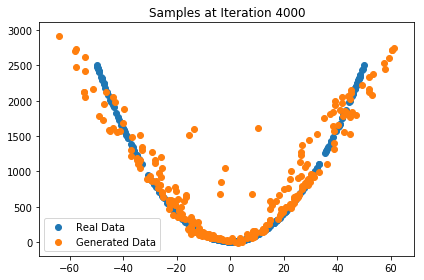

Iterations: 4100	 Discriminator loss: 1.3920	 Generator loss: 0.6002
Iterations: 4200	 Discriminator loss: 1.3397	 Generator loss: 0.6041
Iterations: 4300	 Discriminator loss: 1.3653	 Generator loss: 0.6215
Iterations: 4400	 Discriminator loss: 1.3438	 Generator loss: 0.6090
Iterations: 4500	 Discriminator loss: 1.3619	 Generator loss: 0.5969
Iterations: 4600	 Discriminator loss: 1.3516	 Generator loss: 0.6894
Iterations: 4700	 Discriminator loss: 1.3296	 Generator loss: 0.5184
Iterations: 4800	 Discriminator loss: 1.3284	 Generator loss: 0.6223
Iterations: 4900	 Discriminator loss: 1.3497	 Generator loss: 0.6724
Iterations: 5000	 Discriminator loss: 1.3039	 Generator loss: 0.5814


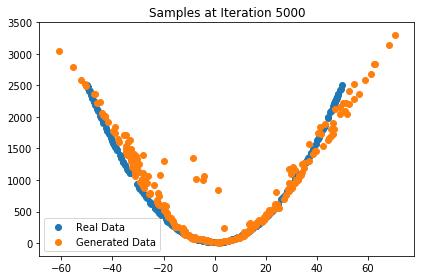

Iterations: 5100	 Discriminator loss: 1.3645	 Generator loss: 0.6781
Iterations: 5200	 Discriminator loss: 1.3783	 Generator loss: 0.6902
Iterations: 5300	 Discriminator loss: 1.3618	 Generator loss: 0.6889
Iterations: 5400	 Discriminator loss: 1.3777	 Generator loss: 0.8186
Iterations: 5500	 Discriminator loss: 1.3828	 Generator loss: 0.5425
Iterations: 5600	 Discriminator loss: 1.3872	 Generator loss: 0.8506
Iterations: 5700	 Discriminator loss: 1.3531	 Generator loss: 0.4448
Iterations: 5800	 Discriminator loss: 1.2916	 Generator loss: 0.5634
Iterations: 5900	 Discriminator loss: 1.3120	 Generator loss: 0.5606
Iterations: 6000	 Discriminator loss: 1.3630	 Generator loss: 0.6943


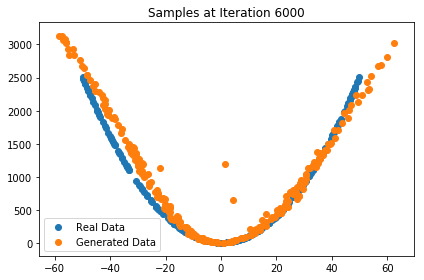

Iterations: 6100	 Discriminator loss: 1.2908	 Generator loss: 0.5251
Iterations: 6200	 Discriminator loss: 1.3769	 Generator loss: 0.8464
Iterations: 6300	 Discriminator loss: 1.3493	 Generator loss: 0.4910
Iterations: 6400	 Discriminator loss: 1.3277	 Generator loss: 0.6730
Iterations: 6500	 Discriminator loss: 1.2332	 Generator loss: 0.4783
Iterations: 6600	 Discriminator loss: 1.2494	 Generator loss: 0.5454
Iterations: 6700	 Discriminator loss: 1.3366	 Generator loss: 0.5186
Iterations: 6800	 Discriminator loss: 1.3642	 Generator loss: 0.6483
Iterations: 6900	 Discriminator loss: 1.3208	 Generator loss: 0.5994
Iterations: 7000	 Discriminator loss: 1.3747	 Generator loss: 0.6741


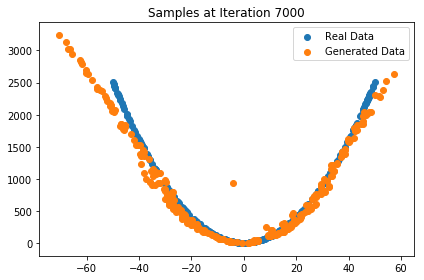

Iterations: 7100	 Discriminator loss: 1.2982	 Generator loss: 0.4951
Iterations: 7200	 Discriminator loss: 1.3332	 Generator loss: 0.6378
Iterations: 7300	 Discriminator loss: 1.3826	 Generator loss: 0.6085
Iterations: 7400	 Discriminator loss: 1.2195	 Generator loss: 0.5899
Iterations: 7500	 Discriminator loss: 1.3037	 Generator loss: 0.6036
Iterations: 7600	 Discriminator loss: 1.1977	 Generator loss: 0.6480
Iterations: 7700	 Discriminator loss: 1.3374	 Generator loss: 0.5044
Iterations: 7800	 Discriminator loss: 1.3017	 Generator loss: 0.5192
Iterations: 7900	 Discriminator loss: 1.3336	 Generator loss: 0.6439
Iterations: 8000	 Discriminator loss: 1.3218	 Generator loss: 0.5397


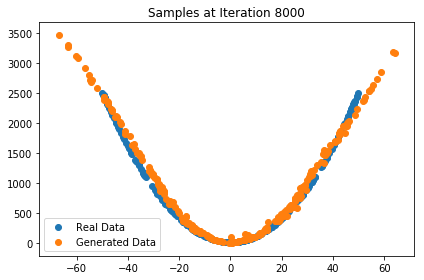

Iterations: 8100	 Discriminator loss: 1.3586	 Generator loss: 0.7926
Iterations: 8200	 Discriminator loss: 1.3072	 Generator loss: 0.5307
Iterations: 8300	 Discriminator loss: 1.3247	 Generator loss: 0.5969
Iterations: 8400	 Discriminator loss: 1.3693	 Generator loss: 0.7652
Iterations: 8500	 Discriminator loss: 1.3667	 Generator loss: 0.6344
Iterations: 8600	 Discriminator loss: 1.1652	 Generator loss: 0.5160
Iterations: 8700	 Discriminator loss: 1.3145	 Generator loss: 0.6496
Iterations: 8800	 Discriminator loss: 1.4423	 Generator loss: 0.4244
Iterations: 8900	 Discriminator loss: 1.2799	 Generator loss: 0.4579
Iterations: 9000	 Discriminator loss: 1.4814	 Generator loss: 0.5210


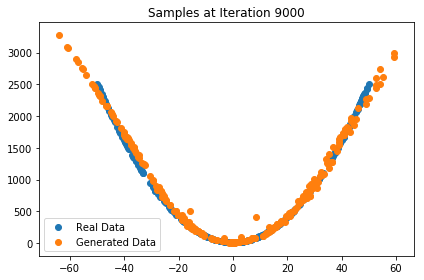

Iterations: 9100	 Discriminator loss: 1.2885	 Generator loss: 0.4959
Iterations: 9200	 Discriminator loss: 1.2721	 Generator loss: 0.6009
Iterations: 9300	 Discriminator loss: 1.2575	 Generator loss: 0.5247
Iterations: 9400	 Discriminator loss: 1.3129	 Generator loss: 0.7592
Iterations: 9500	 Discriminator loss: 1.1739	 Generator loss: 0.5008
Iterations: 9600	 Discriminator loss: 1.3433	 Generator loss: 0.5628
Iterations: 9700	 Discriminator loss: 1.2989	 Generator loss: 0.5396
Iterations: 9800	 Discriminator loss: 1.3316	 Generator loss: 0.5594
Iterations: 9900	 Discriminator loss: 1.2748	 Generator loss: 0.4431
Iterations: 10000	 Discriminator loss: 1.3305	 Generator loss: 0.6325


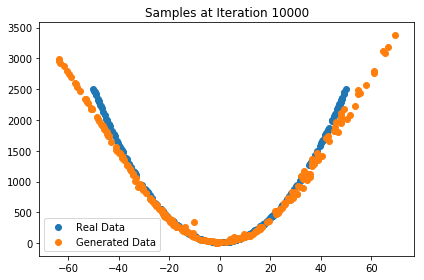

In [32]:
f = open('loss_logs.csv','w')
f.write('Iteration,Discriminator Loss,Generator Loss\n')

for i in range(training_steps):
    # as real input we take a sample of data sampled from a parabola centered in 0
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 2)

    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
        
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    # we write the results every 10 iterations
    if i%100 == 0:
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
        f.write("%d,%f,%f\n"%(i,dloss,gloss))
        dloss_list.append(dloss)
        gloss_list.append(gloss)
    # we plot the generated data every 1000 iterations
    if i%1000 == 0:
        plt.figure()
        # generate synthetic data with current state of the generator
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        # plot real and synthetic data
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        #plt.savefig(results_path + 'iteration_%d.png'%i)
        plt.show()
        plt.close()

f.close()

# **Analysing results**

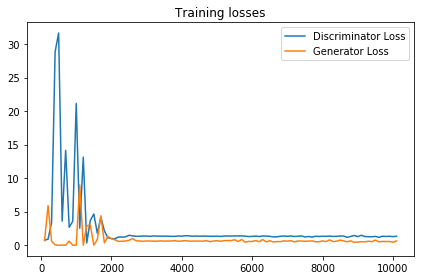

In [34]:
plot_losses(dloss_list, gloss_list, step=100)

In [0]:
def plot_losses(dloss_list, gloss_list, step=100):
    # Plot losses functions
    plt.figure()
    xax = plt.plot(range(step,training_steps+step,step), dloss_list, label="Discriminator Loss")
    gax = plt.plot(range(step,training_steps+step,step), gloss_list, label="Generator Loss")

    plt.legend()
    plt.title('Training losses')
    plt.tight_layout()
    plt.show()
    #plt.savefig(results_path + 'losses.png')
    plt.close()

**References:**

1.   https://blog.paperspace.com/implementing-gans-in-tensorflow/
2.   https://github.com/aadilh/blogs/blob/new/basic-gans/basic-gans/code/gan.py

